# Lecture 2 - Notes on Causal Calculus - Econ 232M - UCLA 
*Instructor: Rodrigo Pinto*

The causal inference can be divided into three sub-areas: 
- Discovering the causal model from the data
- Identifying the causal effect when the causal structure is known 
- Estimating an identifiable causal effect from the data.

Most of this notebook focuses on the second item of causal inference (identification), 
even though we investigate a little on the first item (dicovery) as well.



## 1. Causal Model

**Causal Model:** defined by **4** components:
-  **Variables:** observed and/or unobserved random variables<br>
$\mathcal{T} =\{V,X,T,Y\}.$
-  **Error Terms:** that are mutually independent<br>
$\epsilon_V,\epsilon_X,\epsilon_T,\epsilon_Y$
-  **Structural Equations** for each variable (autonomous)<br>
$f_V,f_X,f_T,f_Y.$
-  **Causal Relations** among variables <br>
(map of the inputs of each structural equation)<br>
$ V = f_V(\epsilon_V); \: X = f_X(V,\epsilon_X);\:  T = f_T(X,\epsilon_T);,\: Y = f_Y(T,V,\epsilon_Y)$

- **Recursive Property :** No variable is descendant of itself. <br>
 Autonomy + Indep. Errors + Recursivity $ \Rightarrow$ **Bayesian Network**
- **Local Markov Condition** (LMC): a variable is independent of its non-descendants conditioned on its parents.\\
- **Graphoid Axions** (GA): new independence relations based on the LMC relations
- **Benefit** of Bayesian Network Tools translates causal links into independence relations


**Local Markov Condition (LMC)** (Kiiveri, 1984, Lauritzen, 1996)

If a model is acyclical, i.e., $Y \notin D(Y)\: \forall \: Y \in \mathcal{T}$ then any variable is independent of its non-descendants, conditional on its parents:

$\newcommand{\statindep}{\perp\!\!\!\perp}$


\begin{equation*}
\mathbf{LMC:} Y \statindep \mathcal{T}\setminus De(Y)|Pa(Y) \: \forall \: Y \in V.
\end{equation*}

**Graphoid Axioms (GA)** (Dawid, 1979)
\begin{align*}
\text{Symmetry: }       & X \statindep Y|Z \Rightarrow Y \statindep X|Z.\\
\text{Decomposition: }  & X \statindep (W,Y)|Z \Rightarrow X \statindep Y|Z.\\
\text{Weak Union: }     & X \statindep (W,Y)|Z \Rightarrow X \statindep Y|(W,Z).\\
\text{Contraction: }    & X \statindep W|(Y,Z) \text{ and }  X \statindep Y|Z   \Rightarrow X \statindep (W,Y)|Z.\\
\text{Intersection: }   & X \statindep W|(Y,Z)  \text{ and } X \statindep Y|(W,Z) \Rightarrow X \statindep (W,Y)|Z\\
\text{Redundancy: }     & X \statindep Y|X.
\end{align*}

It is useful to understand the $d$-separation (Pearl, 2010):

- Unblocked Path: consecutive arrows that do not present a collider (``head-to-head'' edge)
- **Rule 1:** $X$ and $Y$ are called $d$-separated if all paths from $X$ and $Y$ are blocked by a collider
- $X \statindep Y$ iff $X$ and $Y$ are $d$-separated
- An edge $Z$ is said to block a path of consecutive arrows
- $X$ and $Y$ are called $d$-separated by $Z$ if:
- **Rule 2:** $Z$ blocks all no-colliders paths between $X$ and $Y$
- **Rule 3:** $Z$ unblocks the path if it is a collider (or a descendent of a collider) in the path $X$-$Y$

**Formal definition of $d$-separation:**

- If $G$ is a directed graph in which $X$, $Y$ and $Z$ are disjoint sets of vertices,
- then $X$ and $Y$ are $d$-connected by $Z$ in $G$ if and only if:
1. There exists an undirected path $U$ between some vertex in $X$ and some vertex in $Y$ such that for every collider $C$ on $U,$ either $C$ or a descendent of $C$ is in $Z,$<br>
2. And no non-collider on $U$ is in $Z.$<br>
- $X$ and $Y$ are $d$-separated by $Z$ in $G$ if and only if they are not $d$-connected by $Z$ in $G$


**Finding Matching Variables**
- Let $G$ be a causal model
- You seek to find matching variables $X$ such that $Y(t) \statindep T|X$
- Then $Y(t) \statindep T|X$ holds iff
1. $X$ $d$-separates $T,Y$<br>
2. In the DAG $G_{\underline{T}}$ that excludes arrows emerging from $T$<br>



## 2. Introduction to Directed Acyclic Graphs


Directed cyclical graphs (DAGs) are a powerful tool to understand and deal with causal inference.<br>
A DAG is a directed acyclic graph, a visual encoding of a joint distribution of a set of variables. <br>
In a DAG all the variables are depicted as vertices and connected by arrows or directed paths, <br>
sequences of arrows in which every arrow points to some direction. DAGs are acyclic because no directed path can form a closed loop.

We will use two R packages to examine DAGs:

- The `dagitty` package <br>
This is an effective tool for drawing and analyzing DAGs.<br>
Available functions include the identification of minimal sufficient adjustment sets for estimating causal effects.
- The `causaleffect` package <br>
Enable us to perform more complex calculations such as the do-calculus.
- The `igraph` package <br>
It is a package used by `causaleffect` to lad a DAG.
- The `ggdag` package <br>
It is a package for the visualization of the DAGs

Also check the library:
- The `lavaan` package <br>
It is a package for structural equation modeling.

If this is the first time you are using these packages, you must install them first.<br>
The code to install the packages is commented by the sybol `#`
To install the package, simply delete the symbol `#` and run the codes one by one.<br>
You do not need to **install** the packages afterwards.<br>
But you will always call the package using `library()`.


In [1]:
rm(list=ls()) # Caution: this clears the Environment
# It is always useful to clean teh environment when you start a new notebook.
# This way you ca control the packages you are using.'


In [2]:
#install.packages("lavaan")
library(lavaan)

This is lavaan 0.6-11
lavaan is FREE software! Please report any bugs.



In [3]:
#install.packages("igraph")
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [4]:
#install.packages("causaleffect")
library(causaleffect)


Attaching package: ‘causaleffect’


The following object is masked from ‘package:utils’:

    recover




In [5]:
install.packages("dagitty")
library(dagitty)

Installing package into ‘/home/chris/.Rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’



Attaching package: ‘dagitty’


The following object is masked from ‘package:igraph’:

    edges




In [6]:
#install.packages("ggplot2") # This is a package for visualizations
library(ggplot2)            # It is necessary to install ggdag   

In [7]:
install.packages("devtools")
devtools::install_github("malcolmbarrett/ggdag")
library(ggdag)


Installing package into ‘/home/chris/.Rlibs’
(as ‘lib’ is unspecified)




igraph (1.3.0 -> 1.3.1) [CRAN]


Installing 1 packages: igraph

Installing package into ‘/home/chris/.Rlibs’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpzCjAPw/remotes2defe478d415/malcolmbarrett-ggdag-7adad8c/DESCRIPTION’
─  preparing ‘ggdag’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ggdag_0.2.4.9000.tar.gz’
   


Installing package into ‘/home/chris/.Rlibs’
(as ‘lib’ is unspecified)


Attaching package: ‘ggdag’


The following object is masked from ‘package:stats’:

    filter




# 3. Basic Operations

We first define the graph in this exercise using dagitty syntax and plot it.<br>
Let's start with a variation of the standard IV model that include mathcing variables:


Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



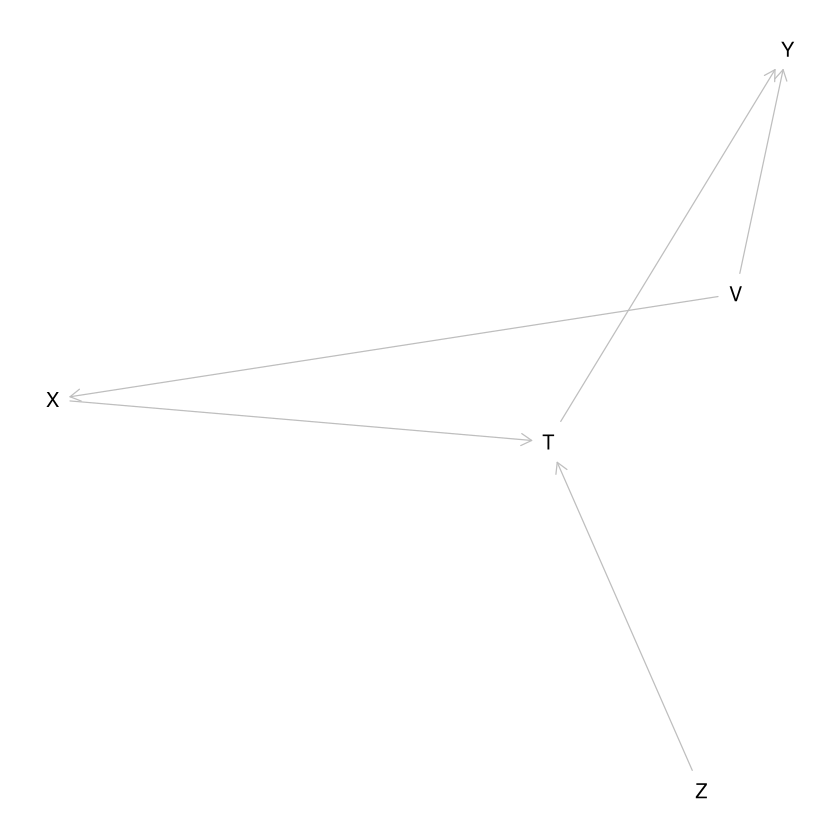

In [8]:
g <- dagitty('dag {
    Z -> T -> Y <- V
    V -> X ->T 
}')
plot(g)

We can plot the DAG using a better format using `ggdag`
You can install the package using the following commmand:

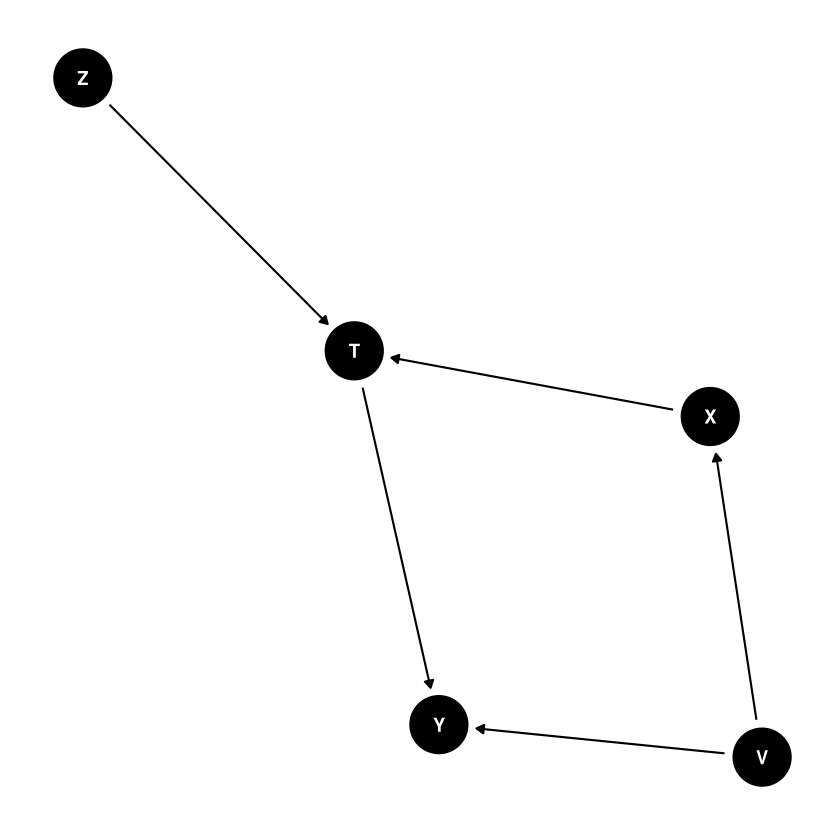

In [9]:
g <- dagitty('dag {
    Z -> T -> Y <- V
    V -> X ->T 
}')

ggdag(g) + theme_dag()


It is useful to specify the following information in every DAG:
- The position of each variable
- The exposure (Treatment)
- The outcome  
- The observed variables (adjusted or conditioned)
- The Unobserved variables (latent)
It is also good to specify the 



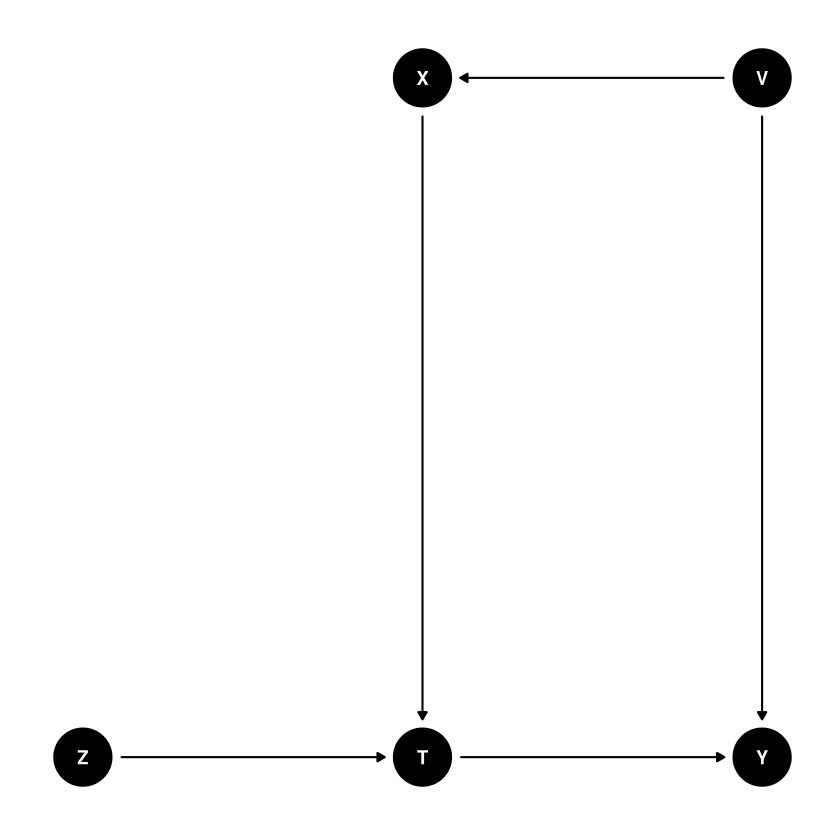

In [10]:
G <- dagitty('dag {
    Z [adjusted,pos="0,0"]
    T [exposure,pos="1,0"]
    Y [outcome,pos="2,0"]
    X [adjusted,pos="1,0.5"]
    V [unobserved,pos="2,0.5"]
    Z -> T -> Y <- V
    V -> X ->T   
}')

ggdag(G) + theme_dag()


We can copntrol for the size of the DAG $G$ using ggplot.<br>
The command 'node_equivalent_dags()' describes equivalent DAGs with respect to the causal effect of the
treatment (`[exposure]`) and teh outcome (`[outcome]`)


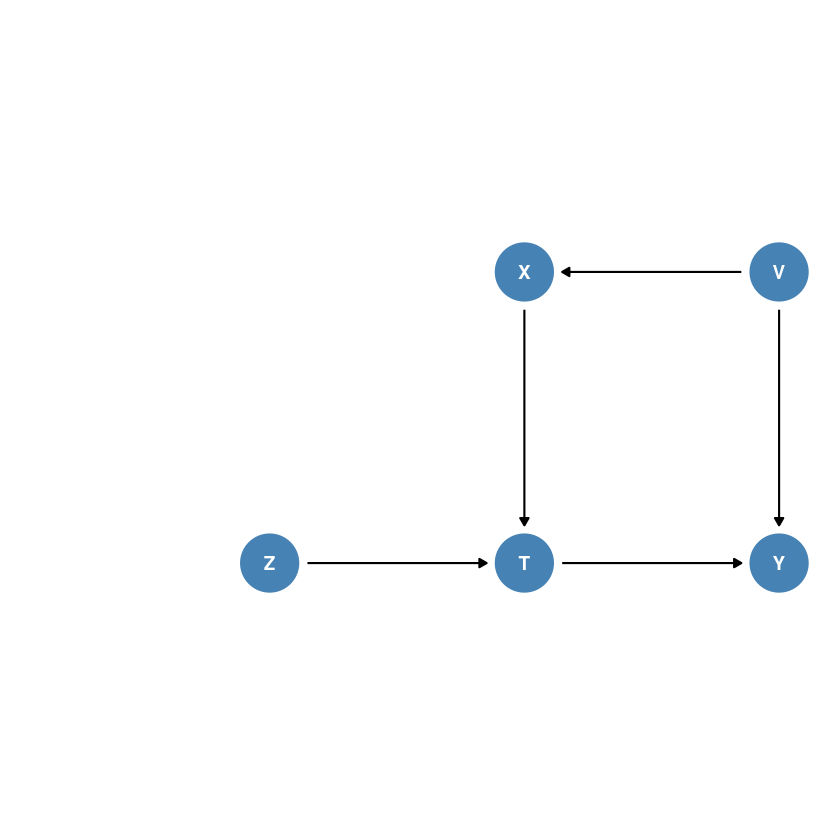

In [11]:
G %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )


We can reposrt the relatives (ancestors, children, decendents and parents) of a variable as:

In [12]:
print(parents(G, "T"))
print(children(G, "T"))
print(ancestors(G, "T"))
print(descendants(G, "T"))

[1] "X" "Z"
[1] "Y"
[1] "T" "Z" "X" "V"
[1] "T" "Y"


All the pathways between say $T$ and $Y$ are given by:

In [13]:
paths(G, "T", "Y")

$paths
[1] "T -> Y"           "T <- X <- V -> Y"

$open
[1] TRUE TRUE

The list all Testable Implications of the Model $G$ is given by:<br>
**Note** that the testable im-plications depend on how we define the observed and unobserved variables.<br>
The testable implications are only based on observed variables.


The Local Markov Conditions (**LMC**) of the model represented by the DAG $G$ <br>
is generated by the following command:

` impliedConditionalIndependencies( G, type = "basis.set", max.results = Inf)`




In [14]:
 impliedConditionalIndependencies( G, type = "basis.set", max.results = Inf)

T _||_ V | X, Z
V _||_ Z
X _||_ Z | V
Y _||_ X, Z | T, V
Z _||_ V, X

In [15]:
impliedConditionalIndependencies(G)

X _||_ Z
Y _||_ Z | T, X

Note that the previous command only presents the minimum conditional independence conditions that can be tested.

On the other hand, if we seek to obtail **ALL** the conditional independences generated by the model using the following command: 

In [16]:
 impliedConditionalIndependencies( G, type = "all", max.results = Inf)

T _||_ V | X
T _||_ V | X, Z
V _||_ Z
V _||_ Z | X
V _||_ Z | T, X
V _||_ Z | T, X, Y
X _||_ Y | T, V
X _||_ Y | T, V, Z
X _||_ Z
X _||_ Z | V
Y _||_ Z | T, V
Y _||_ Z | T, X
Y _||_ Z | T, V, X

Given any DAG $G$ we can search for matching variables $X$ that render <br> 
the counterfactual outcome $Y(t)$ statistically independent of the treatment $T$ (exposure)<br>
using the following command:

**Note** that the output of the command below includes all the sets of both observed and unobserved matching variables.


In [17]:
adjustmentSets( G, "T", "Y", type="all" )

{ V }
{ X }
{ V, X }
{ V, Z }
{ X, Z }
{ V, X, Z }

The output of the above commeand gives all the set of variables that renders the counrterfactiual $Y(t)$ statsitically independent of $T.$<br>
This means that the following statsitical relationship hold:

- $Y(t) \statindep T| V$
- $Y(t) \statindep T|X$
- $Y(t) \statindep T|(V, X)$
- $Y(t) \statindep T|(V, Z)$
- $Y(t) \statindep T|(X, Z)$
- $Y(t) \statindep T|(V, X, Z)$


We can search for instrumental variables that can be used to evaluate the causal effect of the 
treatment (exposure) variable $T$ on the oputcome $Y$ by the following command:

In [18]:
instrumentalVariables(G)

 Z

Otherwise, you can define the exposure and the dependent variable as:

In [19]:
instrumentalVariables(G, exposure = "T", outcome = "Y")

 Z

The command `dseparated` states if a variable is $d$-separated (statsitically indepednent)
given some conditioning variable set. 

Notationally, the command is written as:

`dseparated( G, "V", "T", "T")`
- Return `TRUE` if $V \statindep T|X$
- Rerutns `FALSE` otherwise

For isnatance, in our DAG $G$ we do have that $V \statindep T|X:$

In [20]:
dseparated( G, "V", "T", "X")

[1] TRUE

However, it is not true that $Y \stationdep T|X:$ 

In [21]:
dseparated( G, "X", "Y", "T")

[1] FALSE

Note that we do have that:<br>
The counterfactual outcome $Y(t)$ is statsitically incependent of $T$ conditioned on $X.$
This fact was already known due to `adjustmentSets( G, "T", "Y", type="all" )`.<br>
An alternative way to check that $Y(t) \statindep T|X$ holds for the DAG $G$ is to<br>
to check if and check $Y$ is d-separated from $T$ in a new GAD ($GT$) that supresses the arrows arriving from $X:$


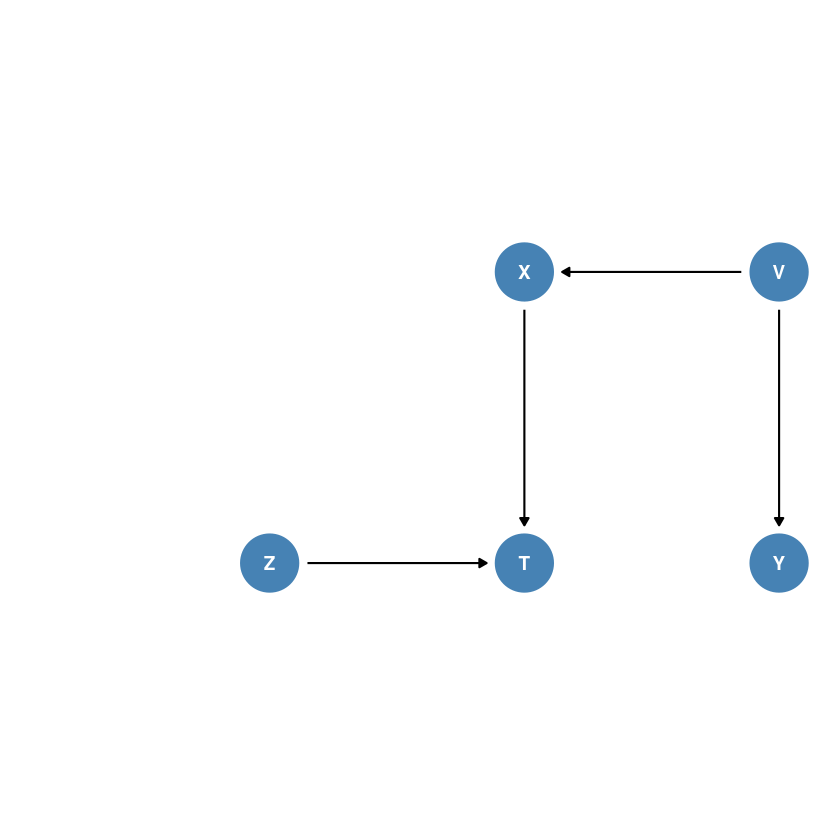

In [22]:
G0 <- dagitty('dag {
    Z [adjusted,pos="0,0"]
    T [exposure,pos="1,0"]
    Y [outcome,pos="2,0"]
    X [adjusted,pos="1,0.5"]
    V [unobserved,pos="2,0.5"]
    Z -> T 
    Y <- V
    V -> X ->T   
}')

G0 %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )

In [23]:
dseparated( G0, "T", "Y", "X") # Y is d-separated from $T$ by $X$ in  the DAG that supresses arroes ariging from $T$ 
dseparated( G , "T", "Y", "X") # Y is not d-separated from $T$ by $X$ in the original DAG


[1] TRUE

[1] FALSE

The next command checka akk the variable that are d-separated by $X$ in the DAG that supresses the arrows arising from $T$ (DAG $G0$):

In [24]:
pairs <- combn( c("Z","T","V","Y"), 2 ) # generate the vector of all 2 by 2 combination of variables

apply( pairs, 2, function(x){
    if( dseparated( G0, x[1], x[2], c("X") ) ){
        message( x[1]," and ",x[2]," are independent given X" )
    }
} )


Z and V are independent given X

Z and Y are independent given X

T and V are independent given X

T and Y are independent given X



NULL

The equivalent classes of the DAG $G$ are DAGs that are equivalent to the one we study <br>
regarding the causal effect of $T$ on $Y.$
The following command gives the equivalent class of DAGs for $G:$


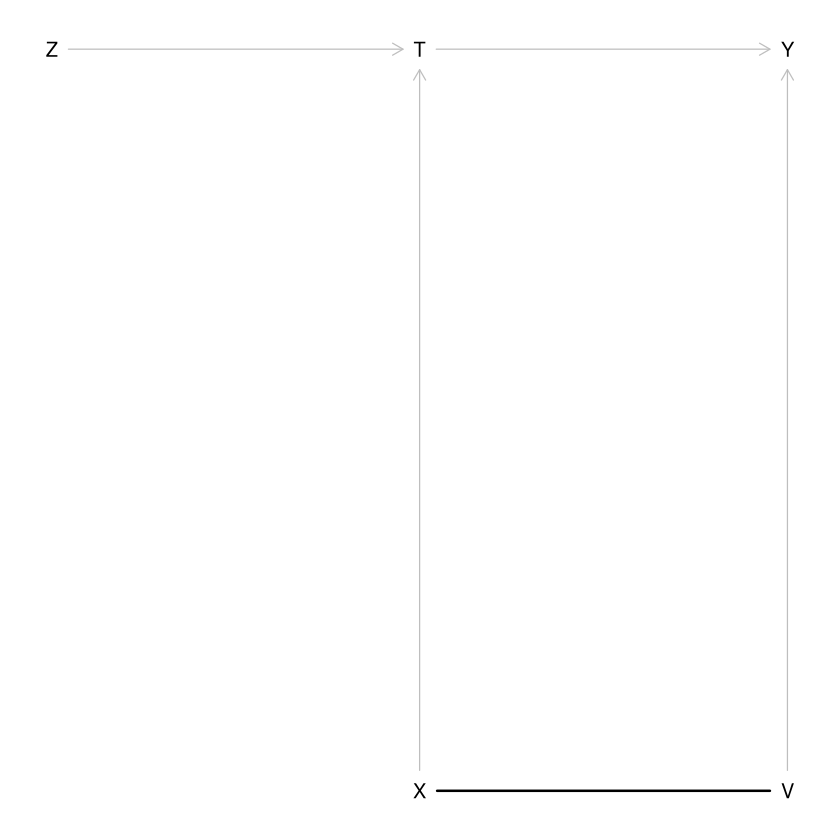

In [25]:
E <- equivalenceClass(G)
plot(E)

Instead, we can use the collamnd 'node_equivalent_dags()' of ggplot2 to observe all the equivalent DAGs:

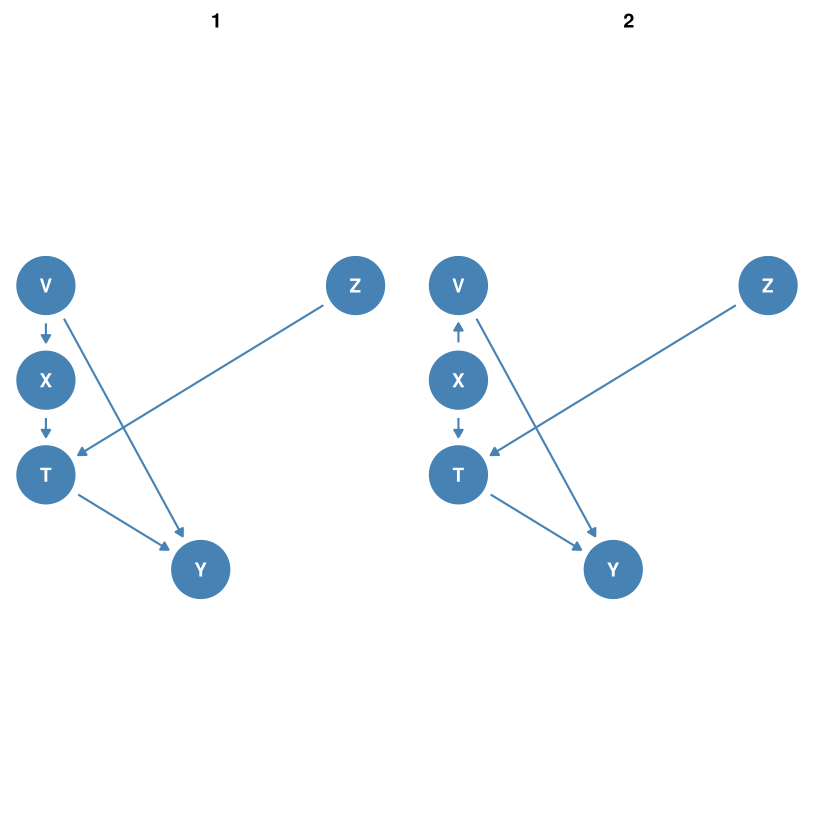

In [26]:
g %>% 
  node_equivalent_dags() %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "steelblue") +
  facet_wrap(~dag) +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.1, 0.2)),
    expand_y = expansion(c(0.9, 0.9))
  )

#  4. Using the Package `causaleffect` in R

The primary goal of the `causaleffect` package is to provide the identification formula for identified causal effects using Pearl's do-calculus.

The package also provides a means of importing `GraphML` files into R while
retaining any attributes that have been set for the nodes or edges of the graph.

The primary function of the package is:
-`causal.effect(Y, X, Z = NULL, G, expr = TRUE)`
where:
- $Y$ is the outcome 
- $X$ is the treatment variable (exposure)
- $G$ is the DAG
- 'expr = TRUE' displays the identifictaion equation



For mode details on the command, we have that:

**Usage**

`causal.effect(y, x, z = NULL, G, expr = TRUE, simp = FALSE, 
  steps = FALSE, primes = FALSE, prune = FALSE, stop_on_nonid = TRUE)`

**Arguments**
- `y` <br>
A character vector of variables of interest given the intervention.

- `x` <br>
A character vector of the variables that are acted upon.

- `z` <br>
A character vector of the conditioning variables.

- `G ` <br>
An igraph object describing the directed acyclic graph induced by the causal model that matches the internal syntax.

- `expr` <br>
A logical value. If TRUE, a string is returned describing the expression in LaTeX syntax. Else, a list structure is returned which can be manually parsed by the function get.expression.

- `simp ` <br>
A logical value. If TRUE, a simplification procedure is applied to the resulting probability object. d-separation and the rules of do-calculus are applied repeatedly to simplify the expression.

- `steps ` <br>
A logical value. If TRUE, returns a list where the first element corresponds to the expression of the causal effect and the second to the a list describing intermediary steps taken by the algorithm.

- `primes` <br>
A logical value. If TRUE, prime symbols are appended to summation variables to make them distinct from their other instantiations.

- `prune` <br>
A logical value. If TRUE, additional steps are taken to remove variables that are not necessary for identification.

- `stop_on_nonid` <br>
A logical value. If TRUE, an error is produced when a non-identifiable effect is discovered. Otherwise recursion continues normally. 



Consider the example determined by the following causal relationships:

- $Y$ is the outcome
- $T$ is the treatment (exposure)
- $K$ is an observed variable that causes the outcome
- $V$ is an unobserved variable that causes $T$ and $K$

The associated DAG is given by:

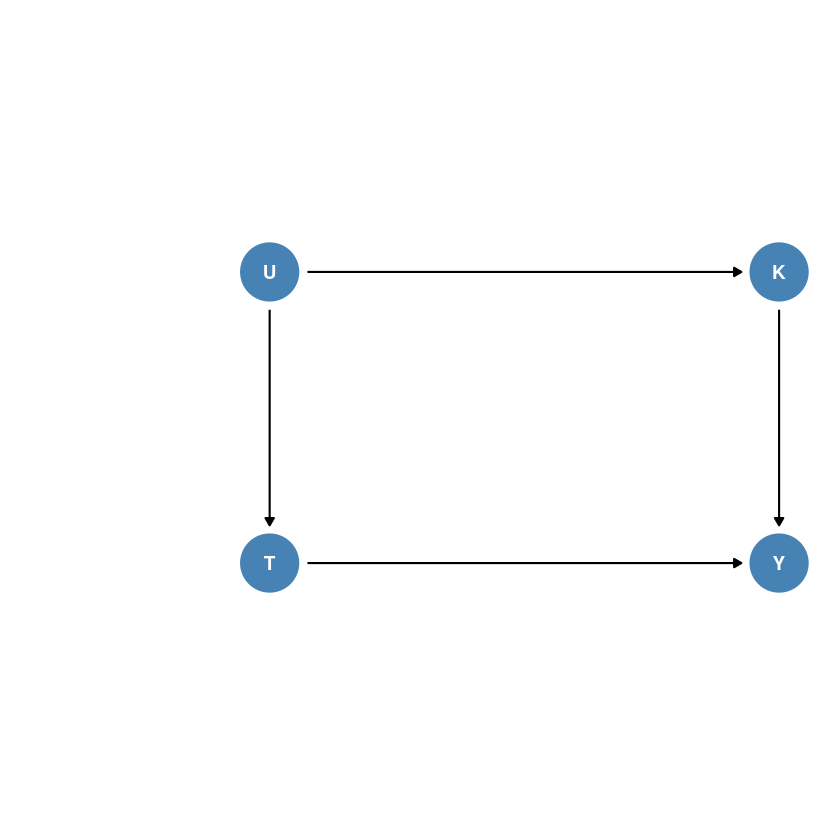

In [27]:
g <- dagitty('dag {
    T [exposure,pos="0,0"]
    Y [outcome,pos="1,0"]
    U [unobserved,pos="0,1"]
    K [adjusted,pos="1,1"]
    T-> Y <- K
    K <- U -> T   
}')

g %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )

The package `causaleffect` does not use unobserved variables ($V$ in our example).<br>
Instead it uses a double arrow:

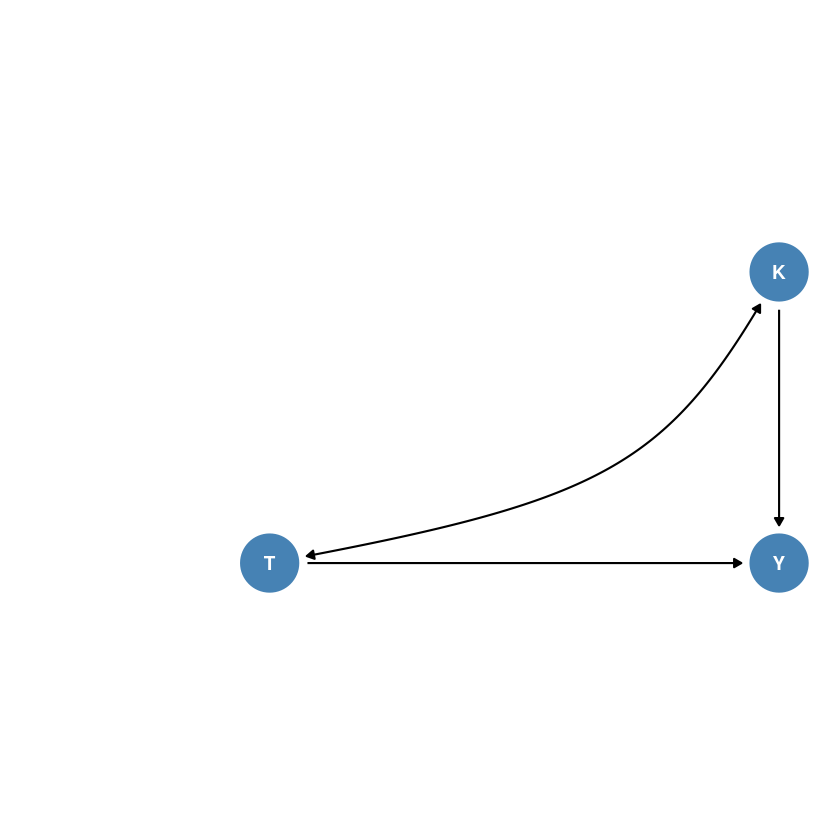

In [28]:
g <- dagitty('dag {
    T [exposure,pos="0,0"]
    Y [outcome,pos="1,0"]
    K [adjusted,pos="1,1"]
    T-> Y <- K
    K <-> T
}')

g %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )

The package `causaleffect` uses teh package `igraph` to determine this DAG.<br>
Note that the DAG only contains observed variables, but this is not a limitation:


In [29]:
# simplify = FALSE to allow multiple edges
g <- graph.formula(
    T -+ Y, 
    K -+ T, 
    K -+ Y , 
    T -+ K, 
    K -+ T,
    simplify = FALSE)

Here the bidirected edge between X and Z is set to be unobserved in graph $g$<br>
This is denoted by giving them a description attribute with the value $U$<br>
It is important to be $U$ (from Unobserved) and not any other letter.<br>
The edges in question are the fourth and the fifth edge.


In [30]:
g <- set.edge.attribute(graph = g, name = "description", index = c(4,5), value = "U")


In [31]:
causal.effect("Y", "T", G = g)

[1] "\\sum_{K}P(Y|K,T)P(K)"

The output from the command give us:<br>
$Y(t) = \sum_{K=k}P(Y|K=k,T=t)P(K=k)$



## 4.1 The front-door Model

The DAG below is a famous front-door Model:

- $T$ is the treatment
- $Y$ is the outcome
- $M$ is the observed mediator
- $V$ is the unobserved variable


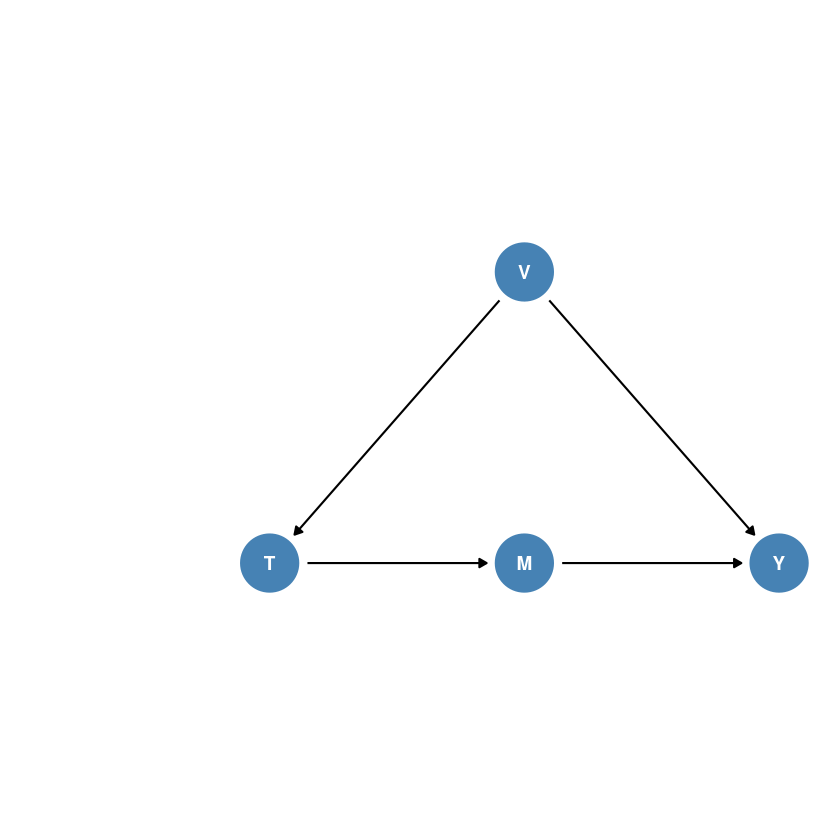

In [32]:
g <- dagitty('dag {
    T   [exposure,pos="0,0"]
    M   [adjusted,pos="1,0"]
    Y   [outcome ,pos="2,0"]
    V   [unobserved,pos="1,1.5"]
    T   -> M -> Y 
    T   <- V -> Y
}')

g %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )

We need to replace the unobserved variable $V$ by a bidirected arrow,<br>
in order to use the package `causaleffect`. 

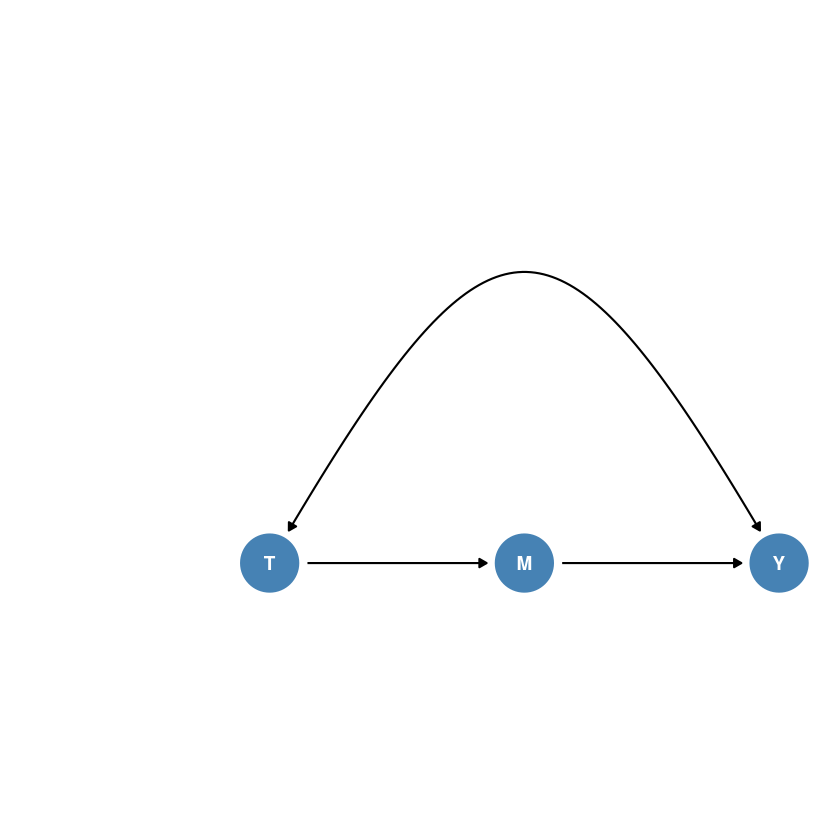

In [33]:
g <- dagitty('dag {
    T   [exposure,pos="0,0"]
    M   [adjusted,pos="1,0"]
    Y   [outcome ,pos="2,0"]
    T   -> M -> Y 
    T   <-> Y
}')

g %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )

The DAG in the package `causaleffect` is given by:<br>
(Note that the nodes 7 to 14 are associated with the unobserved variables $V$)


In [34]:
g <- graph.formula(
    T   -+ M, 
    M   -+ Y, 
    T   -+ Y, 
    Y   -+ T, 
    simplify = FALSE)
g  <- set.edge.attribute(graph = g, name = "description", index = 3:4, value = "U")

The Code that delivers the identifictaion formula is given by:

In [35]:
fdm <- causal.effect(y = c("M", "Y"), x = "T",z = NULL, G = g, expr = TRUE)
cat(fdm)

\left(\sum_{T}P(Y|T,M)P(T)\right)P(M|T)

Identifictaion Formula:

\begin{align*}
E(Y(t)) &= \left(\sum_{t^\prime}P(Y|T=t^\prime,M)P(T=t^\prime)\right)P(M|T=t)
\end{align*}


## 4.1 A Famous Complex Example 

The DAG below is a famous example of an identified causal effect using Pearl's do-calculus method:

- $T$ is the treatment
- $Y$ is the outcome
- $Z_1,Z_2,Z_3$ are observed variables
- $V_1,V_2,V_3,V_4$ are unobserved variables


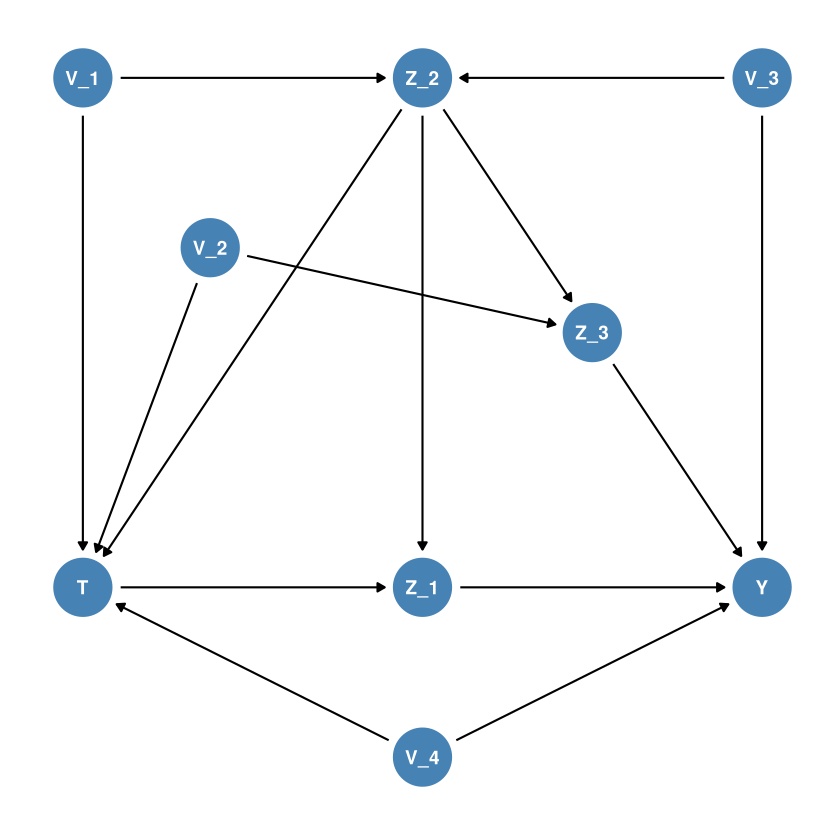

In [36]:
g <- dagitty('dag {
    T   [exposure,pos="0,0"]
    Z_1 [adjusted,pos="2,0"]
    Y   [outcome ,pos="4,0"]
    Z_2 [adjusted,pos="2,3"]
    Z_3 [adjusted,pos="3,1.5"]

    V_1 [unobserved,pos="0,3"]
    V_3 [unobserved,pos="4,3"]
    V_2 [unobserved,pos="0.75,2"]
    V_4 [unobserved,pos="2,-1"]
    
    T   -> Z_1 ->Y 
    Z_2 -> Z_3 ->Y
    Z_2 -> Z_1 
    Z_2 ->T
   
    Z_2 <- V_1 -> T
    T   <- V_2 -> Z_3
    Z_2 <- V_3 -> Y
    T   <- V_4 -> Y

}')

g %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.1, 0.1)),
    expand_y = expansion(c(0.1, 0.1))
  )

We need to replace the unobserved variables $V_1,V_2,V_3,V_4$ by bidirected arrows,<br>
in order to use the package `causaleffect`. 


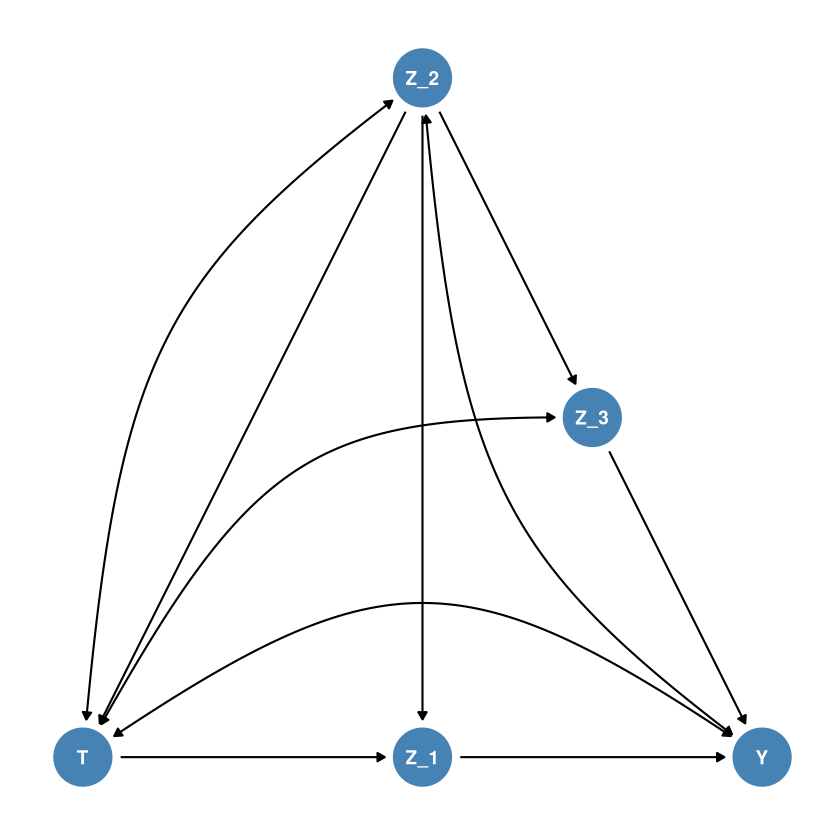

In [37]:
g <- dagitty('dag {
    T   [exposure,pos="0,0"]
    Z_1 [adjusted,pos="2,0"]
    Y   [outcome ,pos="4,0"]
    Z_2 [adjusted,pos="2,3"]
    Z_3 [adjusted,pos="3,1.5"]

       
    T   -> Z_1 ->Y 
    Z_2 -> Z_3 ->Y
    Z_2 -> Z_1 
    Z_2 ->T
   
    Z_2 <-> T
    T   <-> Z_3
    Z_2 <-> Y
    T   <-> Y

}')

g %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.1, 0.1)),
    expand_y = expansion(c(0.1, 0.1))
  )

The DAG in the package `causaleffect` is given by:<br>
(Note that the nodes 7 to 14 are associated with the unobserved variables $V_1,V_2,V_3,V_4$)


In [38]:
g <- graph.formula(
    T   -+ Z_1, 
    Z_1 -+ Y, 
    Z_3 -+ Y, 
    Z_2 -+ T,
    Z_2 -+ Z_1, 
    Z_2 -+ Z_3, 
    T   -+ Y, 
    Y   -+ T, 
    T   -+ Z_3, 
    Z_3 -+ T,
    X   -+ Z_2, 
    Z_2 -+ T, 
    Y   -+ Z_2, 
    Z_2 -+ Y, simplify = FALSE)
g  <- set.edge.attribute(graph = g, name = "description", index = 7:14, value = "U")

The Code that delivers the identifictaion formula is given by:

In [39]:
ce3 <- causal.effect(y = c("Z_1", "Z_2", "Z_3", "Y"), x = "T",z = NULL, G = g, expr = TRUE)
cat(ce3)

\frac{\sum_{T}P(Y|Z_2,T,Z_3,Z_1)P(Z_3|Z_2,T)P(T|Z_2)P(Z_2)}{\sum_{T,Y}P(Y|Z_2,T,Z_3,Z_1)P(Z_3|Z_2,T)P(T|Z_2)P(Z_2)}\left(\sum_{T,Z_3,Y}P(Y|Z_2,T,Z_3,Z_1)P(Z_3|Z_2,T)P(T|Z_2)P(Z_2)\right)P(Z_1|Z_2,T)P(Z_3|Z_2)

Identifictaion Formula:

\begin{align*}
P(Y(t)) = \sum_{z_1,z_2,z_3}P(Z_1|Z_2,T=t)P(Z_3|Z_2) \cdot&  \left(\frac{
    \sum_{t'}P(Y|Z_2,T=t',Z_3,Z_1)P(Z_3|Z_2,T=t')P(T=t'|Z_2)P(Z_2)
}{
    \sum_{t',y}P(Y|Z_2,T=t',Z_3,Z_1)P(Z_3|Z_2,T=t')P(T=t'|Z_2)P(Z_2)
}\right)\\
\cdot& \left(\sum_{t',z_3,y}P(Y|Z_2,T=t',Z_3,Z_1)P(Z_3|Z_2,T=t')P(T=t'|Z_2)P(Z_2)\right)
\end{align*}


We will investigate the same example using the hypothetical framework! Wait and see the difference in the identification equation.

## 4.2 The Pruning Model Example

can you write the DAG associated with another famous example of a DAG that generates an identified causal effect?
The code in the package `causaleffect` is given below:


In [40]:

# Pruning example
p <- graph.formula(
    T   -+ Z_4, 
    Z_4 -+ Y, 
    Z_1 -+ T, 
    Z_2 -+ Z_1, 
    Z_3 -+ Z_2, 
    Z_3 -+ T, 
    Z_5 -+ Z_1, 
    Z_5 -+ Z_4, 
    T   -+ Z_2, 
    Z_2 -+ T, 
    Z_3 -+ Z_2, 
    Z_2 -+ Z_3, 
    Z_2 -+ Y, 
    Y   -+ Z_2,
    Z_4 -+ Y, 
    Y   -+ Z_4, 
    Z_5 -+ Z_4, 
    Z_4 -+ Z_5, 
    simplify = FALSE)

p <- set.edge.attribute(p, "description", 9:18, "U")
causal.effect("Y", "T", G = p, primes = TRUE, prune = TRUE)



[1] "\\frac{\\sum_{Z_3,Z_5,Z_2,Z_4}P(Y|Z_3,Z_5,Z_2,Z_1,T,Z_4)P(Z_4|Z_3,Z_5,Z_2,Z_1,T)P(T|Z_3,Z_5,Z_2,Z_1)P(Z_2|Z_3,Z_5)P(Z_5|Z_3)P(Z_3)}{\\sum_{Z_3,Z_5,Z_2,Z_4,Y^{\\prime}}P(Y^{\\prime}|Z_3,Z_5,Z_2,Z_1,T,Z_4)P(Z_4|Z_3,Z_5,Z_2,Z_1,T)P(T|Z_3,Z_5,Z_2,Z_1)P(Z_2|Z_3,Z_5)P(Z_5|Z_3)P(Z_3)}"

Identifictaion formula is:

\begin{align*}
Y(t) &= \frac{
    \sum_{Z_3,Z_5,Z_2,Z_4}P(Y|Z_3,Z_5,Z_2,Z_1,T=t,Z_4)P(Z_4|Z_3,Z_5,Z_2,Z_1,T=t)P(T|Z_3,Z_5,Z_2,Z_1)P(Z_2|Z_3,Z_5)P(Z_5|Z_3)P(Z_3)
}{
    \sum_{Z_3,Z_5,Z_2,Z_4,Y^{\prime}}P(Y^{\prime}|Z_3,Z_5,Z_2,Z_1,T=t,Z_4)P(Z_4|Z_3,Z_5,Z_2,Z_1,T=t)P(T|Z_3,Z_5,Z_2,Z_1)P(Z_2|Z_3,Z_5)P(Z_5|Z_3)P(Z_3)
}
\end{align*}

The package `causaleffect` has one tool that can simplify identifictaion formulas ganerated by the do-calculus:

In [41]:
# Simplification example
s <- graph.formula(
    T -+ Y, 
    W -+ T, 
    W -+ K, 
    K -+ Y)
causal.effect("Y", "T", G = s, simp = FALSE)
causal.effect("Y", "T", G = s, simp = TRUE)

[1] "\\sum_{W,K}P(Y|W,T,K)P(K|W)P(W)"

[1] "\\sum_{W}P(Y|W,T)P(W)"

Identifictaion Formulas:<br>
$E(Y(t))= \sum_{W,K}P(Y|W,T=t,K)P(K|W)P(W)$<br>
Simplified verson:<br>
$E(Y(t))=\sum_{W}P(Y|W,T=t)P(W)$

# 5. The Hypothetical Model Framework

**Properties of the Hypothetical Model**

- **Insight:** express causality through a hypothetical model
  assigning independent variation to inputs determining
  outcomes.

- **Data:** generated by an empirical model that shares some
  features with the hypothetical model.

- **Simplicity:** the method does not rely on additional tools of
  analysis beyond standard statistical theory

- **Identiﬁcation:** relies on evaluating causal parameters deﬁned
  in the hypothetical model using data generated by the empirical model.


**Deﬁning The Hypothetical Model**

The hypothetical model stems from the following properties:

1. Same set of structural equations as the empirical model. <br>
2. Appends a hypothetical variable that we ﬁx. <br>
3. Hypothetical variable not caused by any other variable. <br>
4. Replaces the input variables we seek to ﬁx by the hypothetical variable. <br>

**Usage:**

**Empirical Model:** Governs the data generating process. <br>
**Hypothetical Model:** Abstract model used to examine causality. <br>



## 5.1 Why the hypothetical variable is useful?

**Properties the Hypothetical Model:**

1. Hypothetical Variable: $\tilde{T}$ replaces the $T$-inputs of structural equations.
2. Characteristic: $\tilde{T}$ is an external variable, i.e., no parents.
3. Thus: Hypothetical variable has independent variation.
4. Usage: hypothetical variable $\tilde{T}$ enables analysts to examine ﬁxing using standard tools of probability (conditioning).

**Main Beneﬁt**

- Fixing in the empirical model is translated to
- statistical conditioning in the hypothetical model
- $E_E(Y (t)) = E_H(Y |\tilde{T} = t)$
- Causality is deﬁned within Statistics/Probability
- No additional Tools Required.


**Identiﬁcation**

- Hypothetical Model allows analysts to deﬁne and examine causal parameters.
- Empirical Model generates observed/unobserved data;
- **Clarity:** What is Identiﬁcation?<br>
The capacity to express causal parameters of the hypothetical model
through observed probabilities in the empirical model.
- **Tools:** What does Identiﬁcation require?<br>
Probability laws that connect Hypothetical and Empirical Models.


## 5.2 Connecting Hypothetical and Empirical Models:

**Two Useful Conditions**

Only two conditions suﬃce to investigate the identiﬁcation of causal parameters!

For any disjoint set of variables $Y, W,$ we have that:

\begin{align*}
& \textbf{Rule 1:} \quad  Y \statindep  \widetilde{T} |(T,W)   \quad \Rightarrow 
 \quad  \quad\mathbf{P}_H(Y| \widetilde{T},T=t',W) = \mathbf{P}_H(Y|T=t',W) = \mathbf{P}_E(Y|T=t',W)\\
& \textbf{Rule 2:}  \quad  Y \statindep  T |(\widetilde{T},W)   \quad \Rightarrow 
 \quad \mathbf{P}_H(Y| \widetilde{T}=t,T,W) = \mathbf{P}_H(Y|\widetilde{T}=t,W) = \mathbf{P}_E(Y|T=t,W)
\end{align*}

If $Y \statindep \tilde{T} |(T , W )$ or $Y \statindep  T |(\tilde{T} , W )$ occurs, <br>
We can connect hypothetical and empirical models!



# 6. Some Interesting Exercises

## 6.1 Example 1: The Front-door Model

Consider the following empirical model:

- $V  = f_{V}(\epsilon_{V})$ (Unobserved Confounder)      
- $T  = f_{T}(V,\epsilon_{T})$ (Observed Treatment)      
- $M  = f_{M}(T,\epsilon_{M})$ (Observed Mediator)   
- $Y  = f_{Y}(M,V,\epsilon_{Y})$ (Observed Outome)    

The empirical model is described by the following DAG:

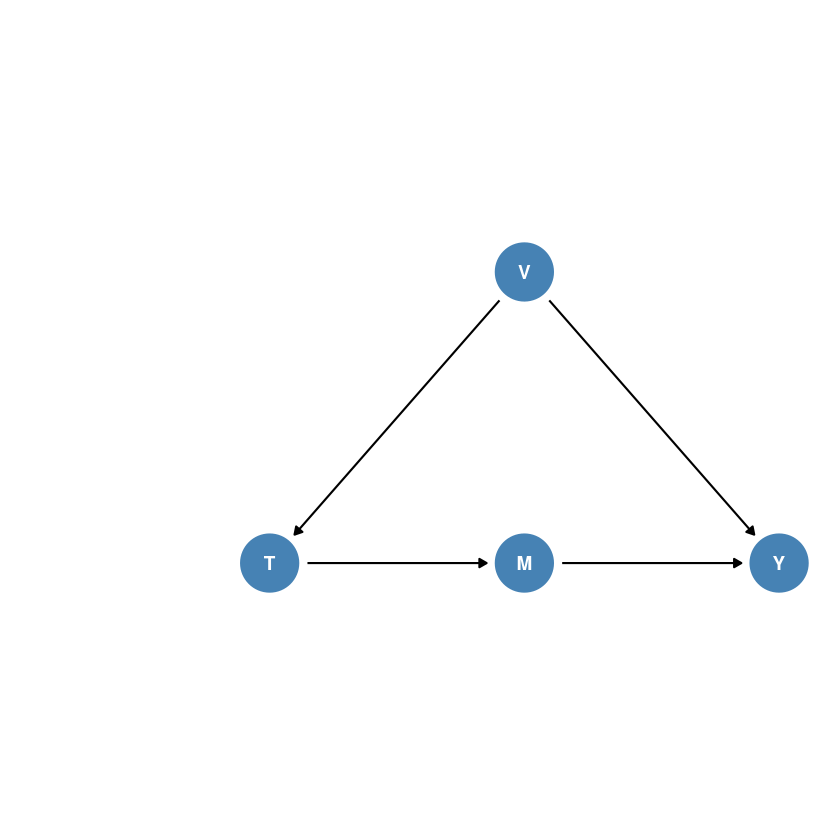

In [42]:
GE<-dagitty('dag {
T [exposure,pos="0,0"]
M [adjusted,pos="1,0"]
Y [outcome,pos="2,0"]
V [unobserved,pos="1,1"]

T-> M -> Y
T<- V -> Y
}')

GE %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )


And its associated Hypothetical Model:

- $\tilde{T} = f_{\tilde{T}}(\epsilon_{\tilde{T}})$   (Hypothetical variable)   
- $V  = f_{V}(\epsilon_{V})$ (Unobserved Confounder)      
- $T  = f_{T}(V,\epsilon_{T})$ (Observed Treatment)      
- $M  = f_{M}(T,\epsilon_{M})$ (Observed Mediator)   
- $Y  = f_{Y}(M,V,\epsilon_{Y})$ (Observed Outome)    


In `Dagitty`, we use $H$ isnstead of $\tilde{T}$ for teh hypothetical variable:

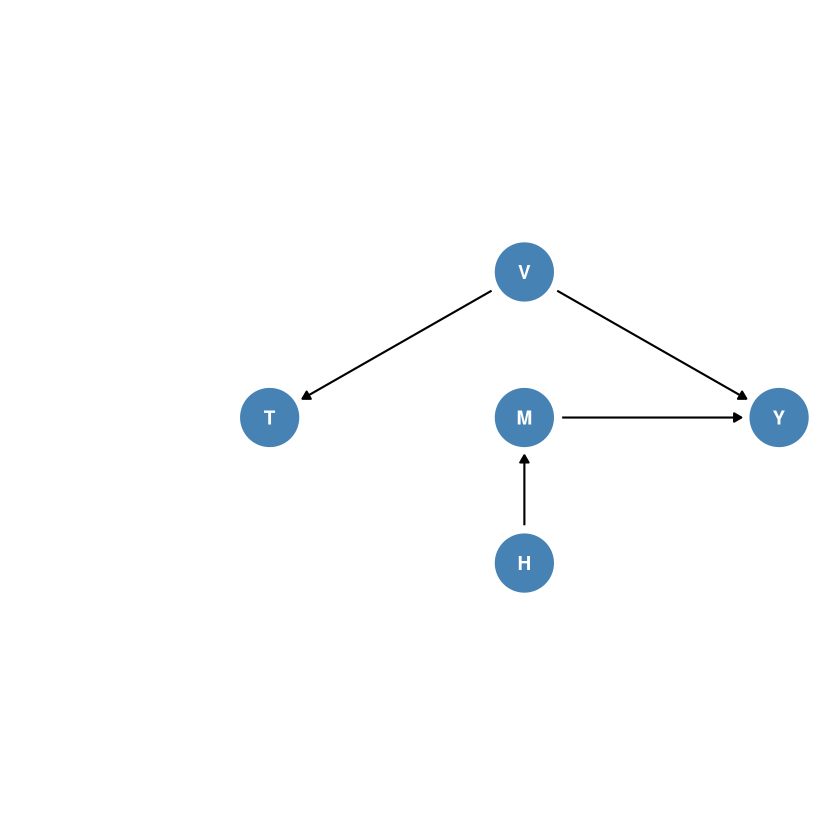

In [43]:
GH<-dagitty('dag {
T [adjusted,pos="0,0"]
M [adjusted,pos="1,0"]
Y [outcome,pos="2,0"]
V [unobserved,pos="1,1"]
H [exposure,pos="1,-1"]

T<- V -> Y
H-> M -> Y

}')

GH %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )

We seek to obtain independence relationships of two kinds:
- We start with $Y \statindep H|(T,K)$ where $K$ is a variable set
- We then search for $K^\prime \statindep H|(T,K^{\prime\prime})$ where $K = K^{\prime} \cup K^{\prime\prime}$

We claim that the following relationships hold:
\begin{align*}
Y~&\statindep~\widetilde{T}|(T,M)\\
M~&\statindep~T|(\widetilde{T})\\
\widetilde{T}~&\statindep~T \text{ always hold }
\end{align*}

These relationships can be confirmed by the following commands:<br>
(Recall we are using $H$ for teh hypothetical variable $\tilde T$)


In [44]:
dseparated( GH , "Y", "H", c("T","M"))
dseparated( GH , "M", "T", c("H"))
dseparated( GH , "H", "T")


[1] TRUE

[1] TRUE

[1] TRUE

Thus we obtain the following procedure to connect empirical and hypothetical models:

**Hypothetical Model:** 

\begin{align*}
P_H(Y|\widetilde{T}=t = \sum_{t',m}
&P_H(Y|m,T=t',\widetilde{T}=t)         \\
&P_H(M=m|T=t',\widetilde{T}=t)                         \\
&P_H(T=t'|\widetilde{T}=t)                                        \\
\end{align*}

**Empirical Model Counterpart:**
\begin{align*}
P_E(Y(t) = \sum_{t',m}
& P_E(Y|M=m,T=t')\\
&P_E(M=m|T=t) \\
&P_E(T=t')  \\
\end{align*}


We examine a few other commands that provide additional infomration regarding the hypothetical model.


The command `adjustments` using the type `canonical` is useful to give the minimal observed set of matching variables.<br>

Observe that the command often ignores $T$ as the necessary conditioning variable for the identifictiaon preocedure using the hypothetical framework.


In [45]:
adjustmentSets( GH, "Y", "H", type="canonical" )

{ M }

In [46]:
adjustmentSets( GH, "M", "T", type="canonical" )

{ H }


One can always use the command:<br>
` impliedConditionalIndependencies( g, type = "all", max.results = Inf)`
to generate **ALL** the conditional independence relationships of the mode.<br>
The five relationships used in the identifictaion paper listed among all relationships.<br>
The (commented) code is below: 


In [47]:
impliedConditionalIndependencies( GH, type = "all", max.results = Inf)

H _||_ T
H _||_ T | M
H _||_ T | V
H _||_ T | M, V
H _||_ T | M, Y
H _||_ T | V, Y
H _||_ T | M, V, Y
H _||_ V
H _||_ V | M
H _||_ V | T
H _||_ V | M, T
H _||_ V | M, Y
H _||_ V | M, T, Y
H _||_ Y | M
H _||_ Y | M, T
H _||_ Y | M, V
H _||_ Y | M, T, V
M _||_ T
M _||_ T | H
M _||_ T | V
M _||_ T | H, V
M _||_ T | V, Y
M _||_ T | H, V, Y
M _||_ V
M _||_ V | H
M _||_ V | T
M _||_ V | H, T
T _||_ Y | V
T _||_ Y | H, V
T _||_ Y | M, V
T _||_ Y | H, M, V

The paths between the hypothetical variable $\tilde T$ (that is $H$) and $Y$ in the Hypothetical Model $GH$ is given by:

In [48]:
paths(GH, "H", "Y" )$paths

[1] "H -> M -> Y"

In [49]:
impliedConditionalIndependencies(GH)

H _||_ T
H _||_ Y | M
M _||_ T

The Local Marcov Conditions (**LMC**) of the Hypothetical Model are given by:

In [50]:
 impliedConditionalIndependencies( GH, type = "basis.set", max.results = Inf)

H _||_ T, V
M _||_ T, V | H
T _||_ H, M, Y | V
V _||_ H, M
Y _||_ H, T | M, V

## 6.2 Multiple Meditors Model 

Consider the following empirical model:

- $T  = f_{T}(V_1,V_2,\epsilon_{T})$      
- $M_1= f_{M_1}(V_3,T,\epsilon_{M_1})$    
- $M_2= f_{M_2}(V_2,M_1,\epsilon_{M_2})$   
- $M_3= f_{M_3}(V_3,M_2,\epsilon_{M_3})$   
- $Y  = f_{Y}(V_1,M_3,\epsilon_{Y})$      

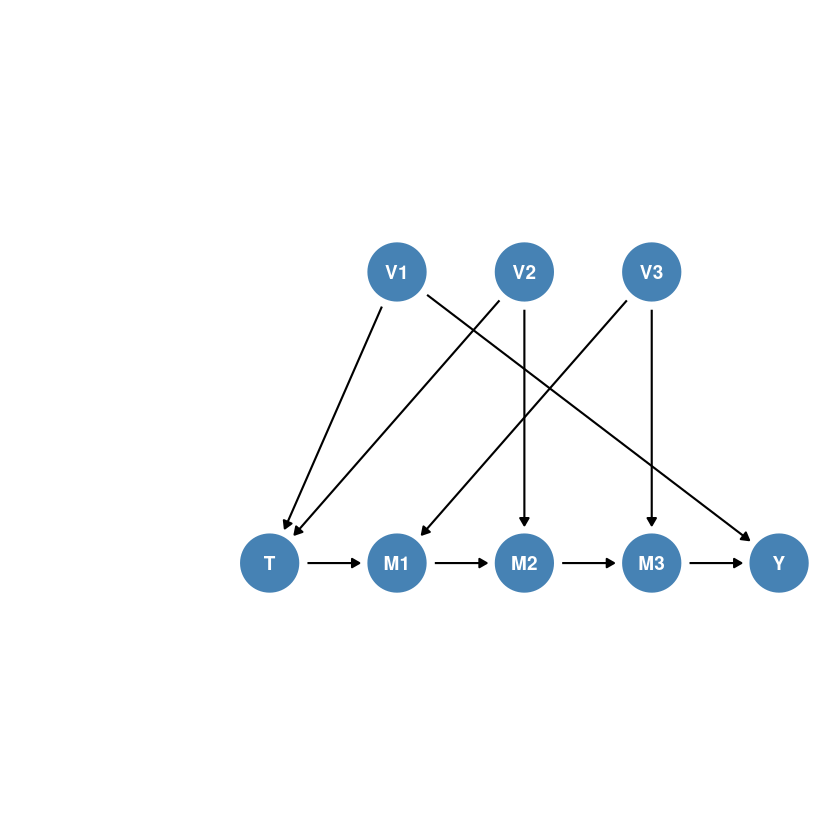

In [51]:
GE<-dagitty('dag {
M1 [adjusted,pos="1,0"]
V1 [unobserved,pos="1,1"]
M2 [adjusted,pos="2,0"]
V2 [unobserved,pos="2,1"]
M3 [adjusted,pos="3,0"]
V3 [unobserved,pos="3,1"]
T  [exposure,pos="0,0"]
Y  [outcome,pos="4,0"]

T-> M1 -> M2 -> M3 -> Y <-V1
M2<- V2 -> T <- V1
M3 <- V3 -> M1 
}')

GE %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )


And its associated Hypothetical Model:

- $\tilde{T} = f_{\tilde{T}}(\epsilon_{\tilde{T}})$     
- $T  = f_{T}(V_1,V_2,\epsilon_{T})$     
- $M_1= f_{M_1}(V_3,\tilde{T},\epsilon_{M_1})$   
- $M_2= f_{M_2}(V_2,M_1,\epsilon_{M_2})$ 
- $M_3= f_{M_3}(V_3,M_2,\epsilon_{M_3})$ 
- $Y  = f_{Y}(V_1,M_3,\epsilon_{Y})$ 

In `Dagitty`, we use $H$ isnstead of $\tilde{T}$ for teh hypothetical variable:

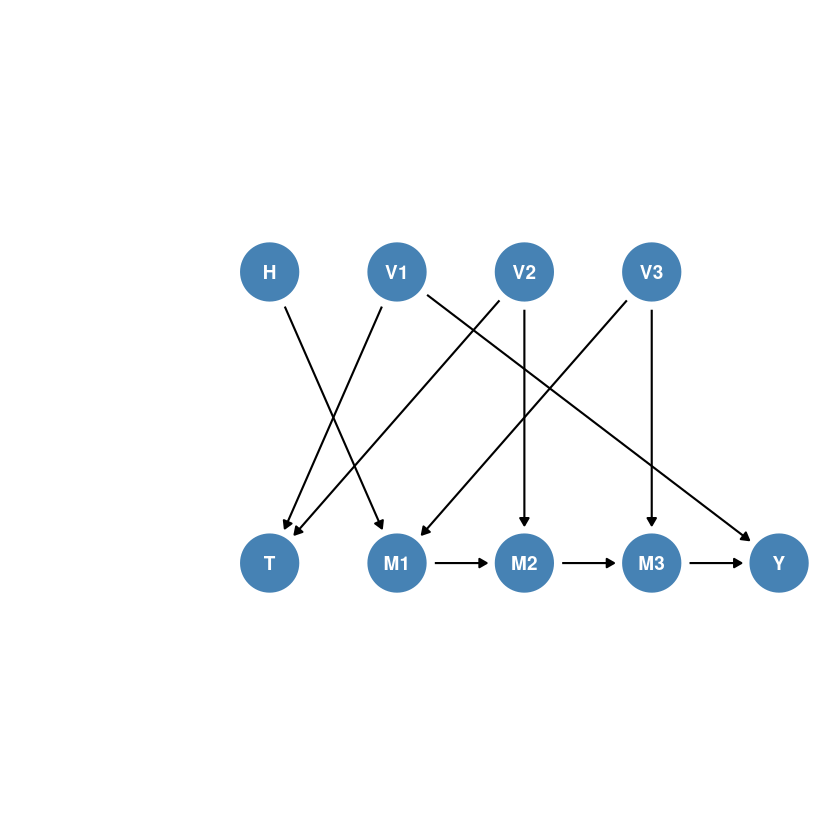

In [52]:
GH<-dagitty('dag {
H  [exposure,pos="0,1"]
M1 [adjusted,pos="1,0"]
V1 [unobserved,pos="1,1"]
M2 [adjusted,pos="2,0"]
V2 [unobserved,pos="2,1"]
M3 [adjusted,pos="3,0"]
V3 [unobserved,pos="3,1"]
T  [adjusted,pos="0,0"]
Y  [outcome,pos="4,0"]

H-> M1 -> M2 -> M3 -> Y <-V1
M2<- V2 -> T <- V1
M3 <- V3 -> M1 
}')

GH %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.5, 0.1)),
    expand_y = expansion(c(0.9, 0.9))
  )


We seek to obtain independence relationships of two kinds:
- We start with $Y \statindep H|(T,K)$ where $K$ is a variable set
- We then search for $K^\prime \statindep H|(T,K^{\prime\prime})$ where $K = K^{\prime} \cup K^{\prime\prime}$

We claim that the following relationships hold:
\begin{align*}
Y~&\statindep~\widetilde{T}|(T,M_3,M_2,M_1)\\
M_3~&\statindep~T|(\widetilde{T},M_2,M_1)\\
M_2~&\statindep~\widetilde{T}|(T,M_1)\\
M_1~&\statindep~T|\widetilde{T}\\
\widetilde{T}~&\statindep~T \text{ always hold }
\end{align*}

These relationships can be confirmed by the following commands:<br>
(Recall we are using $H$ for teh hypothetical variable $\tilde T$)


In [53]:
dseparated( GH , "Y", "H", c("T","M1","M2","M3"))
dseparated( GH , "M3", "T", c("H","M1","M2"))
dseparated( GH , "M2", "H", c("T","M1"))
dseparated( GH , "M1", "T", "H")
dseparated( GH , "H", "T")


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

- The sequence of observed variables $M_1 \rightarrow M_2 \rightarrow M_3$ forms a \textbf{bridge}
- from $Y~\statindep~\widetilde{T}|(T,M_3,M_2,M_1)$ (initial relation)
- to   $\widetilde{T}~\statindep~T$ (final relation)

Thus we obtain the following procedure to connect empirical and hypothetical models:

**Hypothetical Model:** 

\begin{align*}
P_H(Y|\widetilde{T}=t = \sum_{t',m_3,m_2,m_1}
&P_H(Y|m_3,m_2,m_1,T=t',\widetilde{T}=t)         \\
&P_H(M_3=m_3|m_2,m_1,T=t',\widetilde{T}=t)                         \\
&P_H(M_2=m_2|m_1,T=t',\widetilde{T}=t)                             \\
&P_H(M_1=m_1|T=t',\widetilde{T}=t)                                 \\
&P_H(T=t'|\widetilde{T}=t)                                        \\
\end{align*}


**Empirical Model Counterpart:**
\begin{align*}
P_E(Y(t) = \sum_{t',m_3,m_2,m_1}
& P_E(Y|m_3,m_2,m_1,T=t')\\
&P_E(M_3=m_3|m_2,m_1,T=t) \\
&P_E(M_2=m_2|m_1,T=t')  \\
&P_E(M_1=m_1|T=t) \\
&P_E(T=t')  \\
\end{align*}


We examine a few other commands that provide additional infomration regarding the hypothetical model.


The command `adjustments` using the type `canonical` is useful to give the minimal observed set of matching variables.<br>

Observe that the command often ignores $T$ as the necessary conditioning variable for the identifictiaon preocedure using the hypothetical framework.


In [54]:
adjustmentSets( GH, "Y", "H", type="canonical" )

{ M1, M2, M3 }

In [55]:
adjustmentSets( GH, "M3", "T", type="canonical" )

{ H, M1, M2 }

In [56]:
adjustmentSets( GH, "M2", "H", type="canonical" )

{ M1 }

In [57]:
adjustmentSets( GH, "M1", "T", type="canonical" )

{ H }


One can always use the command:<br>
` impliedConditionalIndependencies( g, type = "all", max.results = Inf)`
to generate **ALL** the conditional independence relationships of the mode.<br>
The five relationships used in the identifictaion apper listed among all relationships.<br>
I will not run the code because there are about a hundred relationships.

The (commented) code is below: 


In [58]:
#impliedConditionalIndependencies( g, type = "all", max.results = Inf)

The paths between the hypothetical variable $\tilde T$ (that is $H$) and $Y$ in the Hypothetical Model $GH$ is given by:

In [59]:
paths(GH, "H", "Y" )$paths

[1] "H -> M1 -> M2 -> M3 -> Y"                       
[2] "H -> M1 -> M2 <- V2 -> T <- V1 -> Y"            
[3] "H -> M1 <- V3 -> M3 -> Y"                       
[4] "H -> M1 <- V3 -> M3 <- M2 <- V2 -> T <- V1 -> Y"

In [60]:
impliedConditionalIndependencies(GH)

H _||_ M2 | M1
H _||_ T
H _||_ Y | M3
M1 _||_ T
M1 _||_ Y | M3
M2 _||_ Y | M3
M3 _||_ T | M1, M2

The Local Marcov Conditions (**LMC**) of the Hypothetical Model are given by:

In [61]:
 impliedConditionalIndependencies( GH, type = "basis.set", max.results = Inf)

H _||_ T, V1, V2, V3
M1 _||_ T, V1, V2 | H, V3
M2 _||_ H, T, V1, V3 | M1, V2
M3 _||_ H, M1, T, V1, V2 | M2, V3
T _||_ H, M1, M2, M3, V3, Y | V1, V2
V1 _||_ H, M1, M2, M3, V2, V3
V2 _||_ H, M1, V1, V3
V3 _||_ H, T, V1, V2
Y _||_ H, M1, M2, T, V2, V3 | M3, V1

## 6.3 Revisiting a Famous Complex Example 

The DAG below is a famous example of an identified causal effect using Pearl's do-calculus method:

- $T$ is the treatment
- $Y$ is the outcome
- $Z_1,Z_2,Z_3$ are observed variables
- $V_1,V_2,V_3,V_4$ are unobserved variables

The empirical Model is given by:

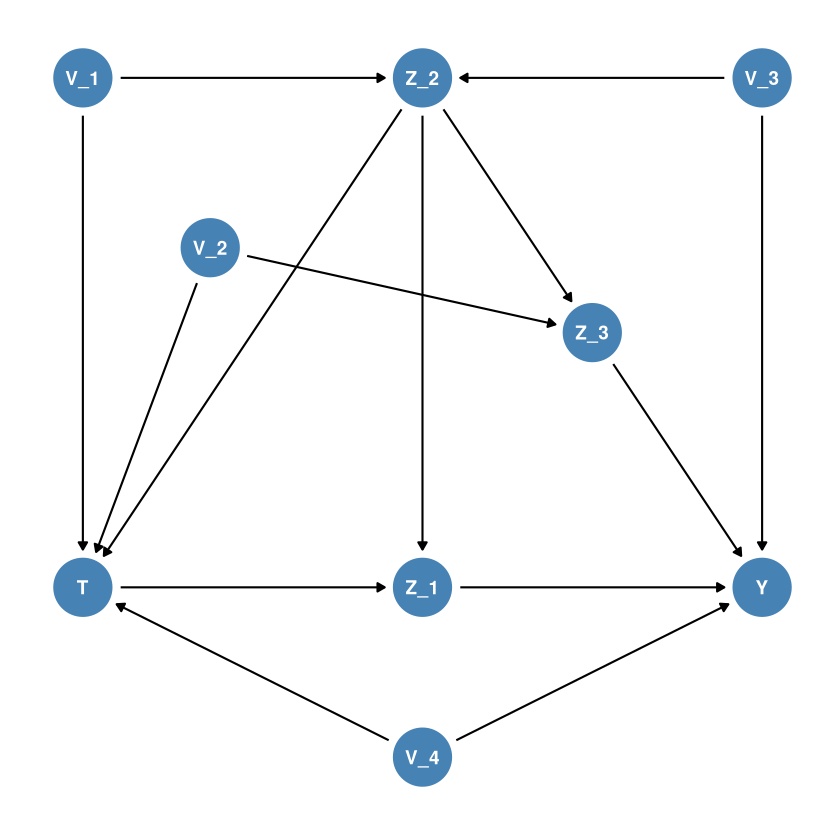

In [62]:
GE <- dagitty('dag {
    T   [exposure,pos="0,0"]
    Z_1 [adjusted,pos="2,0"]
    Y   [outcome ,pos="4,0"]
    Z_2 [adjusted,pos="2,3"]
    Z_3 [adjusted,pos="3,1.5"]

    V_1 [unobserved,pos="0,3"]
    V_3 [unobserved,pos="4,3"]
    V_2 [unobserved,pos="0.75,2"]
    V_4 [unobserved,pos="2,-1"]
    
    T   -> Z_1 ->Y 
    Z_2 -> Z_3 ->Y
    Z_2 -> Z_1 
    Z_2 ->T
   
    Z_2 <- V_1 -> T
    T   <- V_2 -> Z_3
    Z_2 <- V_3 -> Y
    T   <- V_4 -> Y

}')

GE %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.1, 0.1)),
    expand_y = expansion(c(0.1, 0.1))
  )

Now supposed we wish to test if $Z_1 \statindep Z_3|(T,Z_1).$<br>
This can be tested by the following command:<br>
(we will use this result below)


In [63]:
dseparated( GE , "Z_1", "Z_3", c("T","Z_1")) 

[1] TRUE

The Result `TRUE` above implies that the independence condition $Z_1 \statindep Z_3|(T,Z_1)$ holds  for the empirical model above.<br>
**Please remember this result.**

The **Hypothetical Model** is given by:

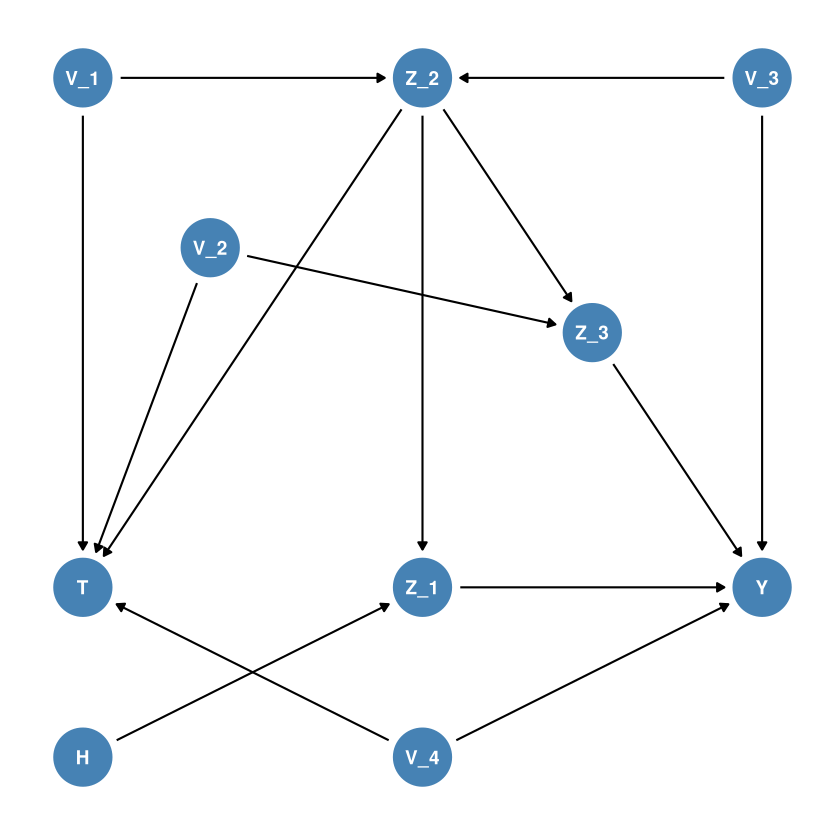

In [64]:
GH <- dagitty('dag {
    T   [adjusted,pos="0,0"]
    H   [exposure,pos="0,-1" ]
    Z_1 [adjusted,pos="2,0"]
    Y   [outcome ,pos="4,0"]
    Z_2 [adjusted,pos="2,3"]
    Z_3 [adjusted,pos="3,1.5"]

    V_1 [unobserved,pos="0,3"]
    V_3 [unobserved,pos="4,3"]
    V_2 [unobserved,pos="0.75,2"]
    V_4 [unobserved,pos="2,-1"]
    
    H   -> Z_1 ->Y 
    Z_2 -> Z_3 ->Y
    Z_2 -> Z_1 
    Z_2 ->T
   
    Z_2 <- V_1 -> T
    T   <- V_2 -> Z_3
    Z_2 <- V_3 -> Y
    T   <- V_4 -> Y

}')

GH %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) + 
  geom_dag_point(color = "steelblue") + 
  geom_dag_text() + 
  geom_dag_edges(edge_color = "black") +
  theme_dag() +
  expand_plot(
    expand_x = expansion(c(0.1, 0.1)),
    expand_y = expansion(c(0.1, 0.1))
  )

We seek to obtain independence relationships of two kinds:
- We start with $Y \statindep H|(T,K)$ where $K$ is a variable set
- We then search for $K^\prime \statindep H|(T,K^{\prime\prime})$ where $K = K^{\prime} \cup K^{\prime\prime}$

We claim that the following relationships hold:
\begin{align*}
Y~&\statindep~\widetilde{T}|(T,Z_1,Z_2,Z_3)\\
Z_1~&\statindep~T|(\widetilde{T},Z_3,Z_2)\\
(Z_3,Z_2)~&\statindep~\widetilde{T}|T\\
\widetilde{T}~&\statindep~T \text{ always hold }
\end{align*}

These relationships can be confirmed by the following commands:<br>
(Recall we are using $H$ for teh hypothetical variable $\tilde T$)


In [65]:
dseparated( GH , "Y", "H", c("T","Z_1","Z_2","Z_3"))
dseparated( GH , "Z_1", "T", c("H","Z_3","Z_2"))
dseparated( GH , c("Z_3","Z_2"), "H", "T")
dseparated( GH , "H", "T")



[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

- The sequence of observed variables $Z_1 \rightarrow (Z_2,Z_3)$ forms a \textbf{bridge}
- from $Y~\statindep~\widetilde{T}|(T,Z_1,Z_2,Z_1)$ (initial relation)
- to   $\widetilde{T}~\statindep~T$ (final relation)


The relationships:
\begin{align*}
Y~&\statindep~\widetilde{T}|(T,Z_1,Z_2,Z_3)\\
Z_1~&\statindep~T|(\widetilde{T},Z_3,Z_2)\\
(Z_3,Z_2)~&\statindep~\widetilde{T}|T\\
\widetilde{T}~&\statindep~T \text{ always hold }
\end{align*}

Enable us to generate the following procedure to connect empirical and hypothetical models:

\begin{align*}
\textbf{Hypothetical Model: } 
P_H(Y|\widetilde{T}=t) =& \sum_{t',z_3,z_2,z_1}
P_H(Y|z_3,z_2,z_1,T=t',\widetilde{T}=t) 
P_H(z_1|z_2,z_2,T=t',\widetilde{T}=t)
P_H(z_2,z_3|T=t',\widetilde{T}=t)                             
P_H(T=t'|\widetilde{T}=t) \\                   
\textbf{Empirical Counterpart: } 
P_E(Y(t) =& \sum_{t',z_3,z_2,z_1}
P_E(Y|z_3,z_2,z_1,T=t')
P_E(z_1|z_2,z_3,T=t) 
P_E(z_2,z_3|T=t')  
P_E(T=t')  \\
\end{align*}



It is useful to contrast the simplicity of the identifictiaon equation generated by the **hypothetical model:**<br>

$$P(Y(t)) = \sum_{t',z_3,z_2,z_1}E(Y|z_3,z_2,z_1,T=t')P(z_1|z_2,z_3,T=t)P(z_2,z_3|T=t')P(T=t')$$

with the complexity generated by the **do-calculus:** (derived in Section )

\begin{align*}
P(Y(t)) = \sum_{z_3,z_2,z_1}P(z_1|z_2,T=t)P(z_3|z_2) \cdot&  \left(\frac{
    \sum_{t'}P(Y|z_2,T=t',z_3,z_1)P(z_3|z_2,T=t')P(T=t'|z_2)P(z_2)
}{
    \sum_{t',y}P(Y|z_2,T=t',z_3,z_1)P(z_3|z_2,T=t')P(T=t'|z_2)P(z_2)
}\right)\\
\cdot& \left(\sum_{t',z_3,y}P(Y|z_2,T=t',z_3,z_1)P(z_3|z_2,T=t')P(T=t'|z_2)P(z_2)\right)
\end{align*}

These two equations identify the same probability of the counterfactual outcome.<br>
**Thus they should be equivalent.**<br>
However, it is**hard to believe** that they are indeed equivalent.

Lukilly, the complexity of the do-calculus was already a topic of interest for some researchers.<br>
In a 2017 paper called *Simplifying Probabilistic Expressions in Causal Inference*,<br>
Santtu Tikka and Juha Karvanen shows that the that the do-calculus equation can be simplified to the following expression:

\begin{align*}
P(Y(t)) = \sum_{z_3,z_2,z_1} P(z_1|z_2,T=t)P(z_2)\cdot \sum_{T=t'}P(Y|z_2, T=t',z_3, z_1)P (z_3|z_2, T=t')P (T=t'|z_2)
\end{align*}

Now observe that:

\begin{align*}
P(Y(t)) 
&= \sum_{z_3,z_2,z_1} P(z_1|z_2,T=t)P(z_2)\cdot \sum_{T=t'}P(Y|z_2, T=t', z_3, z_1)P (z_3|z_2, T=t')P (T=t'|z_2)\\
&= \sum_{z_3,z_2,z_1} P(z_1|z_2,T=t)P(z_2)\cdot \sum_{T=t'}P(Y|z_2, z_3, z_1, T=t')P (z_3|z_2, T=t')\frac{P (z_2|T=t')P(T=t')}{P(z_2)}\\
&= \sum_{z_3,z_2,z_1} P(z_1|z_2,T=t)\cdot \sum_{T=t'}P(Y|z_2, z_3, z_1, T=t')P(z_3|z_2, T=t')P(z_2|T=t')P(T=t')\\
&= \sum_{z_3,z_2,z_1} P(z_1|z_2,z_3,T=t)\cdot \sum_{T=t'}P(Y|z_2, z_3, z_1, T=t')P(z_3,z_2|T=t')P(T=t')\\
&= \sum_{z_3,z_2,z_1}\sum_{T=t'}P(Y|z_2, z_3, z_1, T=t') P(z_1|z_2,z_3,T=t)P(z_3,z_2|T=t')P(T=t')\\
&= \sum_{z_3,z_2,z_1,t'}P(Y|z_2, z_3, z_1, T=t') P(z_1|z_2,z_3,T=t)P(z_3,z_2|T=t')P(T=t')\\
\end{align*}

- The second equation used the Bayes Theorem
- The Third equality cancels out the term $P(z_2)$
- The fourth equation uses the previous result $Z_1 \statindep Z_3|(T,Z_1)$ to write $P(z_1|z_2,T=t)=P(z_1|z_2,z_3T=t)$
- The fifth equation inserts the term inside the $t'$-summation
- The sixth equation is eaxctly the equation generated by the hypothetical model.

**Isn't that AMAZING!!!!**

**Look at the alternating pattern of conditionals!!!!**